#### IMPORTS

In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest



In [24]:
df = pd.read_csv('../files/hr_raw_data.csv', index_col=0)

In [25]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [26]:
df['department'] = df['department'].apply(lambda x: x.title().strip() if type(x) == str else x)

In [27]:
df['jobrole'] = df['jobrole'].apply(lambda x: x.title().strip() if type(x) == str else x)

In [28]:
df['jobrole'].unique()

array(['Research Director', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Laboratory Technician',
       'Sales Representative', 'Human Resources'], dtype=object)

In [29]:
df['department'].unique()

array([nan, 'Research & Development', 'Sales', 'Human Resources'],
      dtype=object)

In [30]:
def impute_department(dato_1, dato_2):

#dato 1 = x["department"] (dato a completar) 
#dato_2 = x["jobrole"] (dato que completa)
#dicc = {departamento1 : roles posibles dentro del departamento1, etc}

        dicc ={"Research & Development": ["Healthcare Representative", "Laboratory Technician", "Manufacturing Director", "Research Scientist", "Research Director"],
            "Sales": ["Sales Executive", "Sales Representative"],
            "Human Resources": ["Human Resources"],
            "Unknown": ["Manager"]} #manager no tiene un departamento específico

        # Parte 1: Si dato_1 ya tiene un valor, lo mantenemos
        if isinstance(dato_1, str):
                        return dato_1

        # Parte 2: Si dato_1 es nulo, buscamos el jobrole en el diccionario:
        for k,v in dicc.items():
            if dato_2 in v: #completamos la celda de x['department'] con x["jobrole"]
                return k
        
        # Parte 3: Si no encontramos coincidencias, devolvemos "Unknown"
        return "Unknown"

In [31]:
# Apply the imputation function
df["department_bis"] = df.apply(lambda x : impute_department(x["department"], x["jobrole"]), axis=1)

#### VARIABLES AND FUNCCIONS

In [32]:
#COLUMN RENAMES:

title_mapping = {"employeenumber": "employee_number",
                "gender": "gender",
                "datebirth": "birth_year",
                "age": "age",
                "maritalstatus": "marital_status",
                "jobrole": "job_title",
                "department": "department",
                "attrition": "terminated",
                "standardhours": "standard_hours",
                "monthlyincome": "monthly_income",
                "remotework": "remote",
                "businesstravel": "business_travel",
                "dailyrate": "daily_rate",
                "distancefromhome": "dist_home",
                "educationfield": "education_field",
                "education": "education_scale",
                "environmentsatisfaction": "env_sat_rate",
                "hourlyrate": "hourly_rate",
                "jobinvolvement": "job_involvement",
                "joblevel": "job_level",
                "jobsatisfaction": "job_sat_rate",
                "monthlyrate": "monthly_rate",
                "numcompaniesworked": "num_comp_worked",
                "overtime": "over_time",
                "percentsalaryhike": "perc_salary_hike",
                "performancerating": "perf_rate",
                "relationshipsatisfaction": "relationship_sat_rate",
                "stockoptionlevel": "stock_opt_level",
                "totalworkingyears": "tot_working_year",
                "trainingtimeslastyear": "traning_times_last_year",
                "worklifebalance": "work_life_balance",
                "yearsatcompany": "year_at_comp",
                "yearsincurrentrole": "year_current_role",
                "yearssincelastpromotion": "year_last_promotion",
                "yearswithcurrmanager": "year_current_mngr",
                "salary": "annual_salary",
                "roledepartament": "role_department"}

#CATEGORIES: 

columns_personal =  ['employee_number', 
                    'gender', 
                    'birth_year', 
                    'age', 
                    'marital_status',
                    'dist_home']

columns_job =   ['job_title',
                 'department',
                'terminated',
                'year_at_comp',
                'year_current_role',
                'standard_hours',
                'remote',
                'business_travel',
                'over_time', 
                'job_level', 
                'stock_opt_level', 
                'traning_times_last_year', 
                'perf_rate',
                'year_last_promotion',
                'year_current_mngr']

columns_education = ['education_field',
                    'education_scale']


columns_income =    ['annual_salary',
                    'monthly_income',
                    'daily_rate',
                    'hourly_rate',
                    'monthly_rate',
                    'perc_salary_hike']

columns_satisfaction =  ['env_sat_rate',
                        'job_involvement',
                        'job_sat_rate',
                        'relationship_sat_rate',
                        'work_life_balance']

columns_emp_bgd =   ['num_comp_worked',
                    'tot_working_year']

drop_colums = ['year_current_role', 'roledepartmet']

#COLUMN REORDER:

new_order_columns = columns_personal+columns_job+columns_education+columns_income+columns_satisfaction+columns_emp_bgd

def reorder_columns(df, list_columns):

    #Reorder columns as per provided list, add all the missing ones at the end.
    
    try:
        df = df[new_order_columns]
        extra_columns = [col for col in df.columns if col not in new_order_columns]
        df = df[ new_order_columns + extra_columns ]
    
    except KeyError as e:
        print(f"KeyError: {e}")
        missing_columns = [col for col in new_order_columns if col not in df.columns]
        print(f"Missing columns: {missing_columns}")

        extra_columns = [col for col in df.columns if col not in new_order_columns]
        df = df[ new_order_columns + extra_columns ]
    
    return df


#DATA ANALYSIS

def data_analysis (dataframe, columns):

    print('📌CATEGORY ANALYSIS:\n')
    display(df[columns_personal].describe().T)
    print('\n')

    for col in columns:
        
        print(f'📌Columna: {col.upper()} \n')
        print('Null counter:', dataframe[col].isnull().sum(), '\n')
        print('These are the unique values:', dataframe[col].unique(),'\n')
        print('These are values counter:', dataframe[col].value_counts(dropna=False),'\n')
        print('-------------')


#### STRUCTURE CLEANING

In [33]:
#ELIMINAR DUPLICADOS, NOS QUEDAMOS CON EL PRIMERO
df[df.duplicated(subset='employeenumber', keep='first')].sort_values('employeenumber')

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework,department_bis
1656,41,No,NaN,1712.182540,NaN,2,5,NaN,1,9,2,1,NaN,3,4,Manager,1,Married,"13829,17$","35955,83$",7,NaN,No,16,"3,0",2,Full Time,1,"22,0",2,"3,0",18,NaN,11,8,"13829,17$",1982,"165950,00$",NaN,NaN,True,Unknown
1652,36,No,NaN,610.174603,NaN,5,2,NaN,1,61,4,0,NaN,3,2,Laboratory Technician,2,Single,"4928,33$","12813,67$",8,Y,No,16,"3,0",4,Full Time,0,"16,0",3,"4,0",13,NaN,3,7,"4928,33$",1987,"59140,00$",NaN,NaN,1,Research & Development
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,Manufacturing Director,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes,Research & Development
1649,29,No,travel_rarely,1032.487286,NaN,21,4,Life Sciences,1,108,2,1,NaN,4,3,Manufacturing Director,1,Divorced,"8339,32$","21682,23$",1,Y,No,11,"3,0",3,NaN,1,"10,0",1,"3,0",10,NaN,8,8,"8339,32$",1994,NaN,NaN,NaN,0,Research & Development
1616,30,No,travel_rarely,1032.487286,NaN,5,3,NaN,1,112,2,1,129.060911,3,3,Sales Executive,4,NaN,"8339,32$","21682,23$",2,Y,No,12,"3,0",3,Part Time,1,NaN,2,"3,0",10,NaN,7,4,"8339,32$",1993,"100071,84$",NaN,NaN,True,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,34,Yes,non-travel,547.238095,NaN,-37,3,Marketing,1,1532,1,0,NaN,4,2,Sales Executive,4,NaN,"4420,00$","11492,00$",8,NaN,Yes,13,"3,0",2,NaN,0,NaN,3,"2,0",5,NaN,0,4,"4420,00$",1989,NaN,NaN,NaN,1,Sales
1637,35,No,travel_rarely,1032.487286,NaN,16,3,Life Sciences,1,1567,4,0,NaN,3,3,Healthcare Representative,3,NaN,NaN,"21682,23$",4,NaN,Yes,12,"3,0",3,Part Time,0,"10,0",2,"3,0",8,NaN,0,0,NaN,1988,"100071,84$",NaN,NaN,1,Research & Development
1638,48,No,travel_rarely,417.960317,NaN,2,5,NaN,1,1568,2,1,NaN,3,2,Sales Executive,4,Married,"3375,83$","8777,17$",2,NaN,No,14,"3,0",1,Part Time,1,"14,0",2,"3,0",9,NaN,6,7,"3375,83$",1975,"40510,00$",NaN,NaN,True,Sales
1657,45,No,travel_rarely,495.753968,NaN,2,3,Other,1,1569,4,0,NaN,3,2,Sales Executive,2,NaN,NaN,"10410,83$",0,NaN,No,19,"3,0",2,Part Time,1,NaN,3,"4,0",8,NaN,3,7,NaN,1978,"48050,00$",NaN,NaN,False,Sales


In [34]:
#RENAME
df = df.rename(columns=title_mapping)

In [35]:
#REORDER
df = reorder_columns(df, new_order_columns)

In [36]:
# Title and strip values

to_title = ['marital_status', 'job_title',  'department', 'education_field']

df[to_title] = df[to_title].apply(lambda x: x.str.title().str.strip() if x.dtype == 'object' else x)

In [37]:
# Replacing values obj to numeric in age

age_update = {
    'thirty-two': 32,
    'twenty-four': 24,
    'thirty': 30,
    'fifty-eight': 58,
    'fifty-two': 52,
    'twenty-six': 26,
    'fifty-five': 55,
    'thirty-seven': 37,
    'thirty-six': 36,
    'forty-seven': 47,
    'thirty-one': 31}

df['age'] = df['age'].replace(age_update)


In [38]:
to_integer = ['employee_number','age','dist_home','education_scale', 'job_involvement','job_level', 'job_sat_rate', 'num_comp_worked', 'perc_salary_hike', 'relationship_sat_rate', 'stock_opt_level', 'tot_working_year', 'work_life_balance','traning_times_last_year', 'year_at_comp', 'year_last_promotion', 'year_current_mngr']

def convert_int (data, list_columns):
    
        for col in list_columns:   
            try: 
                data[col] = data[col].str.replace(',','.')
                data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')

            except:  data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
  

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   employee_number          1678 non-null   Int64   
 1   gender                   1678 non-null   object  
 2   birth_year               1678 non-null   int64   
 3   age                      1665 non-null   Int64   
 4   marital_status           1003 non-null   object  
 5   dist_home                1678 non-null   Int64   
 6   job_title                1678 non-null   object  
 7   department               312 non-null    object  
 8   terminated               1678 non-null   object  
 9   year_at_comp             1678 non-null   Int64   
 10  year_current_role        35 non-null     object  
 11  standard_hours           1327 non-null   object  
 12  remote                   1678 non-null   object  
 13  business_travel          877 non-null    object  
 14  over_time    

In [39]:
convert_int(df, to_integer)

In [40]:
convert_float = ['annual_salary','monthly_income','daily_rate']
def replace_currency(value):
        try:
                value = float(value.replace("$", "").replace(",", "."))
                return value
        except:
            return value
#df[convert_float] = df[convert_float].apply(replace_currency)




for col in convert_float:
     df[col]=df[col].apply(replace_currency)

In [41]:
df["marital_status"]=df["marital_status"].replace("Marreid", "Married")

In [84]:
df['age'].isnull().sum()

13

In [82]:
df.isnull().sum() / df.shape[0] * 100 

employee_number             0.000000
gender                      0.000000
birth_year                  0.000000
age                         0.774732
marital_status             40.226460
dist_home                   0.000000
job_title                   0.000000
department                 81.406436
terminated                  0.000000
year_at_comp                0.000000
year_current_role          97.914184
standard_hours             20.917759
remote                      0.000000
business_travel            47.735399
over_time                  41.477950
job_level                   0.000000
stock_opt_level             0.000000
traning_times_last_year     0.000000
perf_rate                  11.918951
year_last_promotion         0.000000
year_current_mngr           0.000000
education_field            46.126341
education_scale             0.000000
annual_salary              16.984505
monthly_income             29.141836
daily_rate                  0.000000
hourly_rate                75.506555
m

In [43]:
df['over_time'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [44]:
numericas = df.select_dtypes(exclude = 'O').columns

In [45]:
df_corr = df[numericas].corr(method = 'pearson')

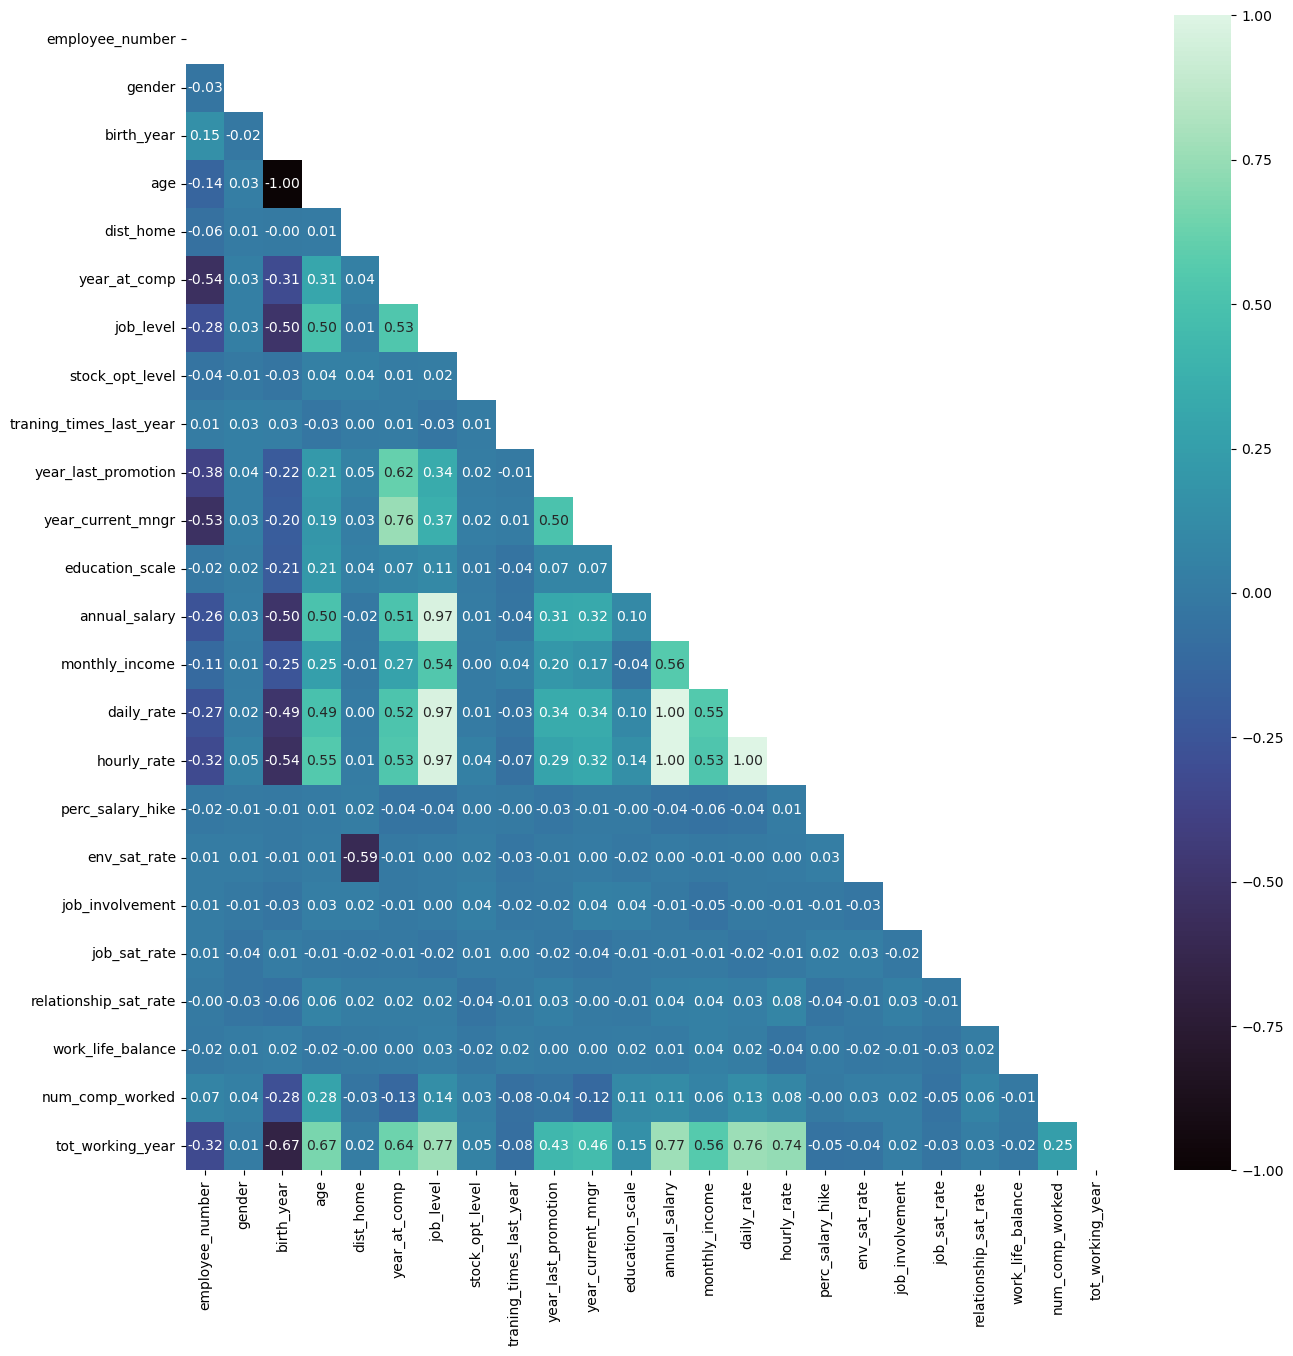

In [46]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [47]:
# Update 0/1 from Genger to M/F. Lo hacemos después para que esta variable entre en el gráfico de correlacion

gender_map = {0: "M", 1:"F"}
df['gender'] = df['gender'].map(gender_map)


`CATEGÓRICAS`
- unknown: marital_status, department (solo manager), business_travel, over_time, education_field, 



In [48]:
df['dist_home_interval'] = pd.cut(df['dist_home'], bins = 3, labels = ['cerca', 'medio', 'lejos'])
df.head()

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year,dist_home_interval
0,1,M,1972,51,NaN,6,Research Director,NaN,No,20,NaN,Full Time,Yes,NaN,No,5,0,5,"3,0",15,15,NaN,3,195370.0,16280.83,2015.722222,NaN,"42330,17$",13,1,3,3,3,3,7,<NA>,lejos
1,2,M,1971,52,NaN,1,Manager,NaN,No,33,NaN,NaN,1,NaN,NaN,5,1,5,"3,0",11,9,Life Sciences,4,199990.0,NaN,2063.388889,NaN,"43331,17$",14,3,2,3,1,3,0,34,medio
2,3,M,1981,42,Married,4,Manager,Research & Development,No,22,NaN,NaN,1,travel_rarely,No,5,0,3,"3,0",11,15,Technical Degree,2,192320.0,NaN,1984.253968,NaN,"41669,33$",11,3,3,4,4,<NA>,1,22,lejos
3,4,F,1976,47,Married,2,Research Director,NaN,No,20,NaN,Full Time,False,travel_rarely,NaN,4,2,2,"3,0",5,6,Medical,4,171690.0,14307.50,1771.404762,NaN,"37199,50$",19,1,3,3,2,<NA>,3,<NA>,medio
4,5,F,1977,46,Divorced,3,Sales Executive,NaN,No,19,NaN,NaN,0,NaN,No,4,1,5,"3,0",2,8,Technical Degree,3,NaN,12783.92,1582.771346,NaN,"33238,20$",12,1,4,1,4,3,2,<NA>,medio


In [49]:
df['dist_home'] = df['dist_home'].abs()

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0
year_at_comp,1678.0,7.124553,6.173837,0.0,3.0,5.0,9.0,40.0
job_level,1678.0,2.064362,1.099425,1.0,1.0,2.0,3.0,5.0
stock_opt_level,1678.0,0.787843,0.843252,0.0,0.0,1.0,1.0,3.0
traning_times_last_year,1678.0,2.79559,1.288657,0.0,2.0,3.0,3.0,6.0
year_last_promotion,1678.0,2.241955,3.246554,0.0,0.0,1.0,3.0,15.0
year_current_mngr,1678.0,4.200238,3.554224,0.0,2.0,3.0,7.0,17.0


In [51]:
abs(-7)

7

- knni: department (menos manager), standard_hours (job_title y anual_salary)


-  Ver correlacion CON education_field PARA VER SI HAY RELACION CON job_title y education_scale

-  HACER BARPLOT CON tot_working_year  PARA VER SI HAY RELACION CON age y year_at_comp

over_time: la cambiamos por unknown, y vamos a agrupar por yes o no y medir el grado de satisfacción.

NEXT STEPS:
Pedir más datos de over_time porque casi la mitad son nulos y puede haber relación con la satisfacción

In [77]:
df.sample(15)

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year,dist_home_interval
522,523,F,1994,29,Single,15,Laboratory Technician,NaN,No,9,NaN,Part Time,True,travel_rarely,Yes,2,0,3,"3,0",0,8,Life Sciences,2,53914.11,NaN,556.256661,NaN,"11681,39$",12,4,2,3,4,3,0,10,lejos
1260,1261,M,2004,19,Single,2,Laboratory Technician,NaN,Yes,1,NaN,Part Time,Yes,travel_rarely,NaN,1,0,3,"4,0",1,0,Life Sciences,3,28111.13,2342.59,290.035510,NaN,"6090,75$",22,2,2,4,3,2,1,1,medio
855,856,M,1991,32,NaN,26,Sales Executive,NaN,No,3,NaN,Part Time,True,non-travel,No,2,0,2,"3,0",2,2,Marketing,4,53914.11,4492.84,556.256661,69.532083,"11681,39$",18,3,3,4,1,3,0,4,lejos
893,894,M,1969,54,Married,5,Research Director,NaN,No,4,NaN,Full Time,0,NaN,NaN,5,1,4,"3,0",1,2,Medical,2,194060.00,16171.67,2002.206349,NaN,"42046,33$",11,1,3,1,3,2,4,24,lejos
32,33,F,1970,53,NaN,5,Manager,NaN,No,14,NaN,Full Time,Yes,travel_rarely,NaN,5,1,3,"3,0",4,8,NaN,3,191324.62,15943.72,1973.984127,246.748016,"41453,67$",11,3,3,3,4,2,4,26,lejos
1154,1155,M,1992,31,NaN,2,Sales Representative,NaN,No,2,NaN,NaN,1,NaN,No,1,1,1,"3,0",1,2,Life Sciences,2,28111.13,2342.59,290.035510,NaN,"6090,75$",19,1,3,3,3,3,0,<NA>,medio
1201,1202,F,1983,40,Married,29,Research Scientist,NaN,No,1,NaN,Part Time,1,NaN,Yes,2,1,3,"3,0",0,0,Medical,2,44220.00,NaN,456.238095,57.029762,"9581,00$",13,29,2,4,4,1,3,16,cerca
966,967,M,1995,28,Single,5,Sales Executive,NaN,No,4,NaN,Part Time,False,travel_rarely,NaN,2,0,3,"3,0",0,2,Medical,4,53914.11,NaN,556.256661,NaN,"11681,39$",14,1,3,4,2,3,1,4,lejos
550,551,M,1992,31,Married,11,Healthcare Representative,Research & Development,No,6,NaN,Part Time,False,travel_rarely,Yes,2,0,2,NaN,0,1,NaN,2,53914.11,4492.84,556.256661,69.532083,"11681,39$",12,3,3,1,4,2,1,6,lejos
1118,1119,F,1994,29,Single,9,Sales Representative,NaN,Yes,2,NaN,Part Time,1,travel_rarely,NaN,1,0,3,"3,0",2,2,NaN,3,27600.00,2300.00,284.761905,35.595238,"5980,00$",13,2,1,2,3,3,1,2,lejos


In [75]:
df['tot_working_year'].unique()

<IntegerArray>
[<NA>,   34,   22,   28,   20,   21,   33,   40,   18,   25,   15,   17,   26,
   16,   24,   14,   23,   27,   19,   11,   38,   37,   13,   12,   29,   10,
   36,   35,    9,   31,   32,    8,    7,   30,    6,    5,    4,    3,    2,
    1,    0]
Length: 41, dtype: Int64

In [ ]:
def replacing (data, col):
    data[col] = int(data[col].str.replace(',',''))

replacing (df, 'tot_working_year')

In [85]:
imputer = KNNImputer(n_neighbors = 5)
knn_imputed = imputer.fit_transform(df[['age', 'birth_year']])
df['age'] = knn_imputed

In [86]:
df['age'].isnull().sum()

0

#### DATA ANALYSYS

##### PERSONAL COLUMNS

In [67]:
data_analysis(df, columns_personal)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: EMPLOYEE_NUMBER 

Null counter: 0 

These are the unique values: <IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
 ...
 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614]
Length: 1614, dtype: Int64 

These are values counter: employee_number
300     2
159     2
271     2
1158    2
191     2
       ..
547     1
546     1
545     1
544     1
1614    1
Name: count, Length: 1614, dtype: Int64 

-------------
📌Columna: GENDER 

Null counter: 0 

These are the unique values: ['M' 'F'] 

These are values counter: gender
M    1009
F     669
Name: count, dtype: int64 

-------------
📌Columna: BIRTH_YEAR 

Null counter: 0 

These are the unique values: [1972 1971 1981 1976 1977 1975 1964 1982 1967 1985 1968 1983 1965 1988
 1978 1990 1987 1989 1970 1980 1963 1991 1986 1974 1984 1973 1979 1993
 1994 1992 1969 1966 1996 1995 1997 1998 1999 2000 2001 2002 2003 2004
 2005] 

These are values counter: birth_year
1992    89
1988    88
1989    86
1994    8

##### JOB COLUMNS

In [68]:
data_analysis(df, columns_job)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: JOB_TITLE 

Null counter: 0 

These are the unique values: ['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Laboratory Technician'
 'Sales Representative' 'Human Resources'] 

These are values counter: job_title
Sales Executive              381
Research Scientist           325
Laboratory Technician        289
Manufacturing Director       168
Healthcare Representative    155
Manager                      115
Sales Representative          96
Research Director             90
Human Resources               59
Name: count, dtype: int64 

-------------
📌Columna: DEPARTMENT 

Null counter: 1366 

These are the unique values: [nan 'Research & Development' 'Sales' 'Human Resources'] 

These are values counter: department
NaN                       1366
Research & Development     203
Sales                       93
Human Resources             16
Name: count, dtype: int64 

-------------
📌Columna: TERMINATED 

Nul

##### INCOME COLUMNS

In [69]:
data_analysis(df, columns_income)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: ANNUAL_SALARY 

Null counter: 285 

These are the unique values: [195370.   199990.   192320.   171690.         nan 100071.84  53914.11
 165950.   199730.   134020.   132060.   195450.   180410.   192460.
 107480.   167520.    62010.   198450.    40010.   104470.   191324.62
 160640.    32100.   102660.   104750.    61620.    47210.   153407.07
  28111.13  46150.   169590.    54060.    59020.   108550.    59140.
  66460.   139730.    66870.    47350.   138720.   190450.    96130.
 115100.   170460.    36920.   198470.    23080.    57470.   104220.
  63470.    23480.    30720.   124900.    80200.   170680.    89430.
 192720.    55770.    26910.    74030.    88230.    35790.   177790.
 182130.   135770.   191900.   171230.   191870.    79880.    70830.
  34070.    29290.   120310.   154270.    51260.    96190.   190330.
 104000.    56740.   191970.    84120.    33480.    53090.    76540.
 128080.    65860.    25190.   170990.   131200.    44440.    98520.
 178610.   137570.  

##### EDUCATION COLUMNS

In [70]:
data_analysis(df,columns_education)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: EDUCATION_FIELD 

Null counter: 774 

These are the unique values: [nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources'] 

These are values counter: education_field
NaN                 774
Life Sciences       367
Medical             286
Marketing           106
Technical Degree     70
Other                63
Human Resources      12
Name: count, dtype: int64 

-------------
📌Columna: EDUCATION_SCALE 

Null counter: 0 

These are the unique values: <IntegerArray>
[3, 4, 2, 1, 5]
Length: 5, dtype: Int64 

These are values counter: education_scale
3    649
4    461
2    322
1    186
5     60
Name: count, dtype: Int64 

-------------


##### SATISFACTION COLUMNS

In [71]:
data_analysis(df,columns_satisfaction)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: ENV_SAT_RATE 

Null counter: 0 

These are the unique values: [ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43] 

These are values counter: env_sat_rate
4     483
3     471
2     316
1     306
35      7
12      7
14      6
13      6
24      5
47      5
36      4
48      4
41      4
46      4
42      4
45      3
11      3
22      3
17      3
18      3
20      3
25      3
27      3
37      2
29      2
19      2
38      2
31      2
15      2
16      2
26      1
39      1
10      1
49      1
21      1
28      1
33      1
43      1
Name: count, dtype: int64 

-------------
📌Columna: JOB_INVOLVEMENT 

Null counter: 0 

These are the unique values: <IntegerArray>
[3, 2, 4, 1]
Length: 4, dtype: Int64 

These are values counter: job_involvement
3    995
2    421
4    170
1     92
Name: count, dtype: Int64 

-------------
📌Columna: JOB_SAT_RATE 

Null counter: 0 

These are the unique values: <IntegerArray>
[3, 4, 1, 

##### EMPLOYEMENT BACKGROUND COLUMNS

In [72]:
data_analysis(df, columns_emp_bgd)

📌CATEGORY ANALYSIS:



,count,mean,std,min,25%,50%,75%,max
employee_number,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
birth_year,1678.0,1986.04708,9.154908,1963.0,1980.0,1987.0,1993.0,2005.0
age,1665.0,36.947748,9.136138,18.0,30.0,36.0,43.0,60.0
dist_home,1678.0,11.184744,10.479008,1.0,2.0,8.0,17.0,49.0




📌Columna: NUM_COMP_WORKED 

Null counter: 0 

These are the unique values: <IntegerArray>
[7, 0, 1, 3, 2, 4, 8, 9, 5, 6]
Length: 10, dtype: Int64 

These are values counter: num_comp_worked
1    597
0    234
3    174
4    166
2    163
7     88
6     75
5     67
9     59
8     55
Name: count, dtype: Int64 

-------------
📌Columna: TOT_WORKING_YEAR 

Null counter: 549 

These are the unique values: <IntegerArray>
[<NA>,   34,   22,   28,   20,   21,   33,   40,   18,   25,   15,   17,   26,
   16,   24,   14,   23,   27,   19,   11,   38,   37,   13,   12,   29,   10,
   36,   35,    9,   31,   32,    8,    7,   30,    6,    5,    4,    3,    2,
    1,    0]
Length: 41, dtype: Int64 

These are values counter: tot_working_year
<NA>    549
10      151
6        88
8        86
9        71
5        68
7        59
4        57
1        55
3        34
12       34
13       31
11       31
14       31
16       30
20       30
15       28
18       28
21       23
17       23
2        21
22       19

In [73]:
df.head()

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,terminated,year_at_comp,year_current_role,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,hourly_rate,monthly_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year,dist_home_interval
0,1,M,1972,51,NaN,6,Research Director,NaN,No,20,NaN,Full Time,Yes,NaN,No,5,0,5,"3,0",15,15,NaN,3,195370.0,16280.83,2015.722222,NaN,"42330,17$",13,1,3,3,3,3,7,<NA>,lejos
1,2,M,1971,52,NaN,1,Manager,NaN,No,33,NaN,NaN,1,NaN,NaN,5,1,5,"3,0",11,9,Life Sciences,4,199990.0,NaN,2063.388889,NaN,"43331,17$",14,3,2,3,1,3,0,34,medio
2,3,M,1981,42,Married,4,Manager,Research & Development,No,22,NaN,NaN,1,travel_rarely,No,5,0,3,"3,0",11,15,Technical Degree,2,192320.0,NaN,1984.253968,NaN,"41669,33$",11,3,3,4,4,<NA>,1,22,lejos
3,4,F,1976,47,Married,2,Research Director,NaN,No,20,NaN,Full Time,False,travel_rarely,NaN,4,2,2,"3,0",5,6,Medical,4,171690.0,14307.50,1771.404762,NaN,"37199,50$",19,1,3,3,2,<NA>,3,<NA>,medio
4,5,F,1977,46,Divorced,3,Sales Executive,NaN,No,19,NaN,NaN,0,NaN,No,4,1,5,"3,0",2,8,Technical Degree,3,NaN,12783.92,1582.771346,NaN,"33238,20$",12,1,4,1,4,3,2,<NA>,medio
